## <font color='goldenrod'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

- Explore what types of films are currently doing the best at the box office.
- Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
---

### b) Defining the Metric for Success

**The project will be considered a success when we are able to proovide three concrete business recommendations to the head of Microsoft's new movie studio.**

**While performing Exploratory Data Anlysis I was required to carry out the following steps:**

- Showcase my work value with clear communication.
- Craft a compelling story for my movie studio project
- Use visuals to explore data and present findings. Choose simple and relevant charts with good formatting.
---

### c) Understanding the Context 

**Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.**

### d) Recording the Experimental Design

1. Load the necessary libraries and datasets for our analysis.
2. Perform data cleaning and pre-processing where necessary.
3. Carry out our analysis.
4. Interpret and summarize findings.
5. Provide recommendations.
---

### e) Data Relevance & Acknowledgement.

**These datasets provided were aggregated from a number of sources listed below:** 

- Box Office Mojo (https://www.boxofficemojo.com/)
- IMDB (https://www.imdb.com/)
- Rotten Tomatoes (https://www.rottentomatoes.com/)
- TheMovieDB (https://www.themoviedb.org/)
- The Numbers (https://www.the-numbers.com/)

**The data provided was relevant to answering the our data analysis question.**

---

## <font color='goldenrod'>2. Loading & The Data</font>

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
bom_movie_gross_df = pd.read_csv(r'data\bom.movie_gross.csv')

bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
IMDB_name_basics_df = pd.read_csv(r'data\imdb.name.basics.csv')

IMDB_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
IMDB_title_akas_df = pd.read_csv(r'data\imdb.title.akas.csv')

IMDB_title_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
df_IMDB_title_basics_df = pd.read_csv(r'data\imdb.title.basics.csv')

df_IMDB_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
IMDB_title_crew_df = pd.read_csv(r'data\imdb.title.crew.csv')

IMDB_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
IMDB_title_principals_df = pd.read_csv(r'data\imdb.title.principals.csv')

IMDB_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [8]:
IMDB_ratings_df = pd.read_csv(r'data\imdb.title.ratings.csv')

IMDB_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
rt_movie_info_df = pd.read_csv(r'data\rt.movie_info.tsv', sep='\t')

rt_movie_info_df.set_index('id', inplace=True)

rt_movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
rt_reviews_df = pd.read_csv(r'data\rt.reviews.tsv', sep='\t', encoding='windows-1254')

rt_reviews_df.set_index('id', inplace=True)

rt_reviews_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
tmdb_movies_df = pd.read_csv(r'data\tmdb.movies.csv', index_col='Unnamed: 0')

tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tn_movie_budgets_df = pd.read_csv(r'data\tn.movie_budgets.csv', index_col='id')

tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## <font color='goldenrod'>3. Preparing The Data</font>

### ⭐ Data Cleaning & Preparation for the `Box Office Mojo` dataset.

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
,title,studio,domestic_gross,foreign_gross,year


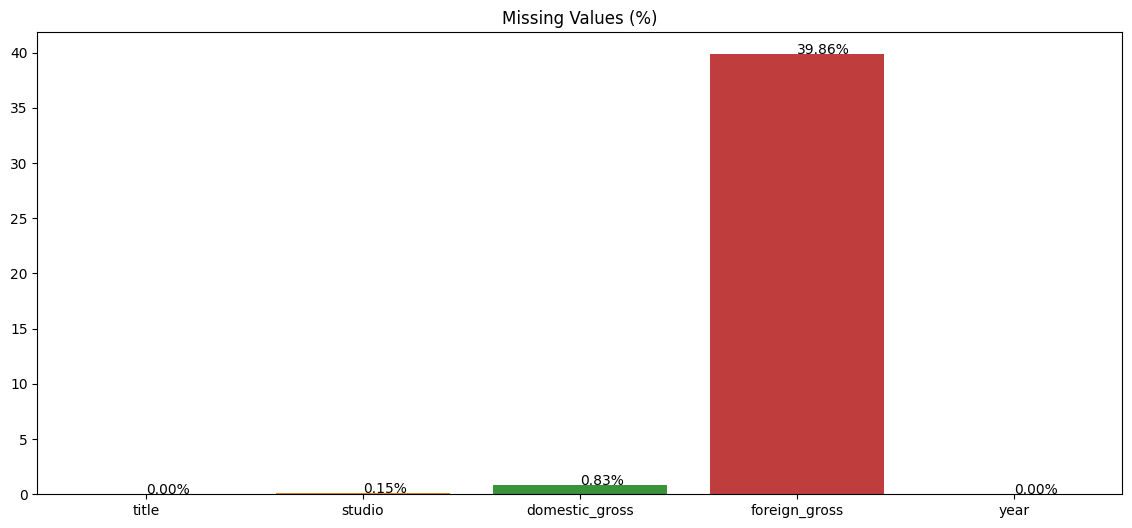

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def visualize_missing_values(df):
    """
    This function takes in a Pandas DataFrame and returns a visualization of missing values as percentages.

    Args:
        df (pd.DataFrame): The Pandas DataFrame to visualize.

    Returns:
        None.
    """

    # Calculate the percentage of missing values for each column
    total_records = df.shape[0]
    missing_percentages = (df.isnull().sum() / total_records) * 100

    # Create a bar chart of the missing values percentages using Seaborn
    plt.figure(figsize=(14, 6))
    sns.barplot(x=missing_percentages.index, y=missing_percentages)
    plt.title("Missing Values (%)")
    for i in range(len(missing_percentages)):
        plt.annotate(f"{missing_percentages[i]:.2f}%", (i, missing_percentages[i]))

    # Check for duplicate rows
    duplicate_rows = df[df.duplicated()]

    # Display the DataFrame (only the first five records)
    display_side_by_side(df.head(), duplicate_rows)  # Empty DataFrame to add space
    plt.show()

def display_side_by_side(*args):
    """
    Display multiple DataFrames side by side.

    Args:
        *args: Variable number of DataFrames.

    Returns:
        None.
    """

    html_str = ""
    for df in args:
        html_str += df.to_html()
    display(HTML(html_str))

if __name__ == "__main__":
    # Create a Pandas DataFrame
    # df = pd.DataFrame({
    #     "id": [1, 2, 3, 4, 5],
    #     "name": ["Bob", "Mary", "Joe", "John", "Jane"],
    #     "height": [170, 160, 130, 180, 150],
    #     "weight": [70, 60, 90, 80, 70],
    #     "age": [40, 33, 50, 25, 30],
    # })

    # # Introduce some missing values for demonstration purposes
    # df.loc[1, 'name'] = None
    # df.loc[2, 'height'] = None

    # # Duplicate the second row
    # df.loc[5] = df.loc[2]

# Visualize the missing values as percentages and display the first five records of DataFrame
    visualize_missing_values(bom_movie_gross_df)



- **3 out of the 5 columns in this dataset contain null values. The `studio` column has very minimal null values. I will just go ahead and drop these records.**
- **As for the `domestic gross` , `foreign_gross` and `year` columns I will drop them as they are present in another more granular dataset.**
- **`title` column will be renamed for consistency across all datasets.**
- **I will also get the top ten studios by total gross and create a new column `top_studio` to indicate whether a studio is in the top ten or not. Also we will get the full names instead of the initials.**

In [14]:
# drop columns not needed for analysis
bom_movie_gross_df.drop(columns=['domestic_gross', 'foreign_gross', 'year'], inplace=True)

# drop rows with missing values
bom_movie_gross_df.dropna(inplace=True)

# rename column
bom_movie_gross_df.rename(columns={'title': 'movie_title'}, inplace=True)

# convert movie_title to lowercase
bom_movie_gross_df['movie_title'] = bom_movie_gross_df['movie_title'].str.lower()

In [15]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  3382 non-null   object
 1   studio       3382 non-null   object
dtypes: object(2)
memory usage: 79.3+ KB


**Calculate a threshold to define the top 10 studios. Any other studios will be collectively be labelled as `Others`**

In [16]:
# threshold = 10

# studio_counts = bom_movie_gross_df['studio'].value_counts()

# top_ten_studios = studio_counts[:threshold].index
# other_studios = studio_counts[threshold:]

# bom_movie_gross_df['full_studio_name'] = bom_movie_gross_df['studio'].apply(lambda x: x if x in top_ten_studios else 'Others')

**Rename studio names to from intials to full names.**

In [17]:
# # Define a mapping of values to be replaced
# name_mapping = {'Par.': 'Paramount', 
#                 'Uni.': 'Universal Pictures', 
#                 'WB': 'Warner Bros.', 
#                 'Fox': '20th Century Fox', 
#                 'Sony': 'Sony Pictures', 
#                 'LGF': 'Lionsgate',
#                 'IFC': 'Independent Film Channel',
#                 'SPC': 'Sony Pictures Classics',
#                 'Magn.': 'Magnolia Pictures',
#                 'BV': 'Buena Vista'
#                 }

# # Replace values in the 'studio' column using the mapping
# bom_movie_gross_df['full_studio_name'] = bom_movie_gross_df['full_studio_name'].replace(name_mapping)

# # drop the 'studio' column
# bom_movie_gross_df.drop(columns='studio', inplace=True)

# bom_movie_gross_df['full_studio_name'].value_counts()

### Data Cleaning & Preparation for the `IMDB Basic Names` dataset.

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


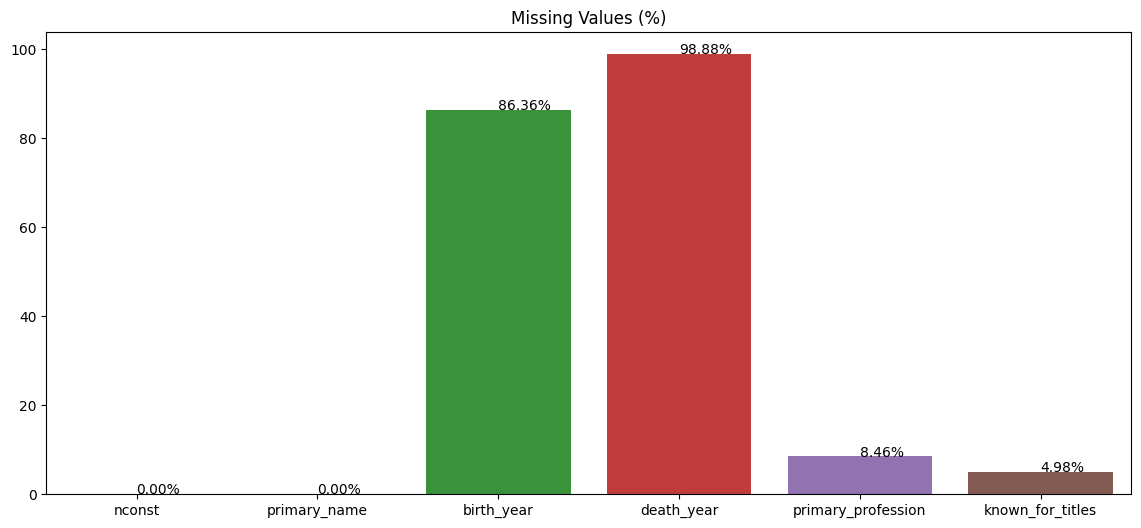

In [18]:
visualize_missing_values(IMDB_name_basics_df)

**Not much information from the above dataset. This primariy crew information that is not going to be instrumental in our analysis.**

### Data Cleaning & Preparation for the `IMDB Original Titles` dataset.

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
,title_id,ordering,title,region,language,types,attributes,is_original_title


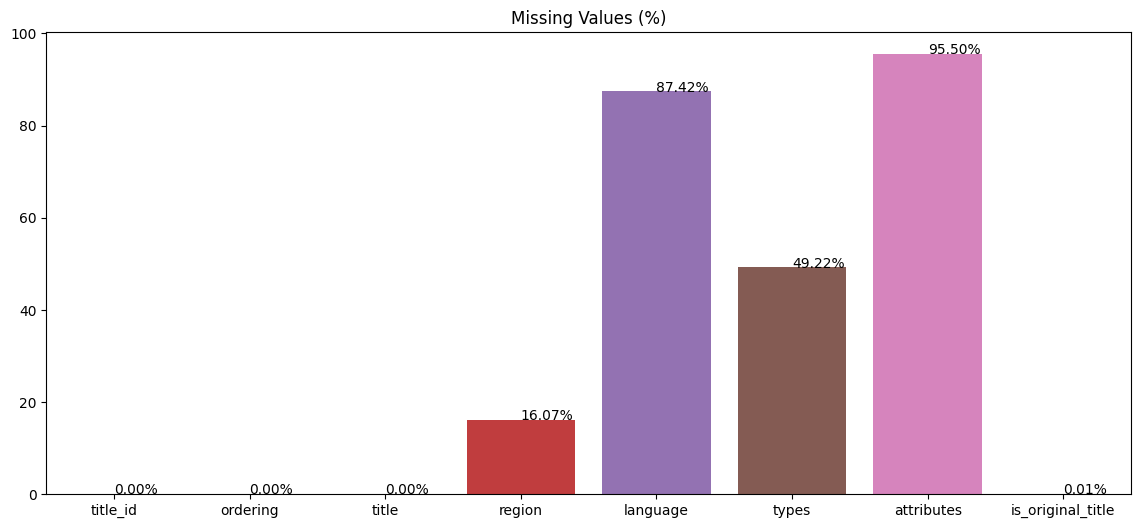

In [19]:
visualize_missing_values(IMDB_title_akas_df)

**The dataset above indicates the original language of each film. However, this information is not relevant for our analysis, since we have another dataset with the titles translated into English. We also observe that some title_ids are repeated, because a film has both an original name and an alternative name. For example, title_id `tt0063540`` has five entries.**

- 0	tt0063540	Sunghursh	Sunghursh	2013	175.0	Action,Crime,Drama
- 1	tt0066787	One Day Before the Rainy Season	Ashad Ka Ek Din	2019	114.0	Biography,Drama
- 2	tt0069049	The Other Side of the Wind	The Other Side of the Wind	2018	122.0	Drama
- 3	tt0069204	Sabse Bada Sukh	Sabse Bada Sukh	2018	NaN	Comedy,Drama
- 4	tt0100275	The Wandering Soap Opera	La Telenovela Errante	2017	80.0	Comedy,Drama,Fantasy

### ⭐ Data Cleaning & Preparation for the `IMDB Basics Titles` dataset.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
,tconst,primary_title,original_title,start_year,runtime_minutes,genres


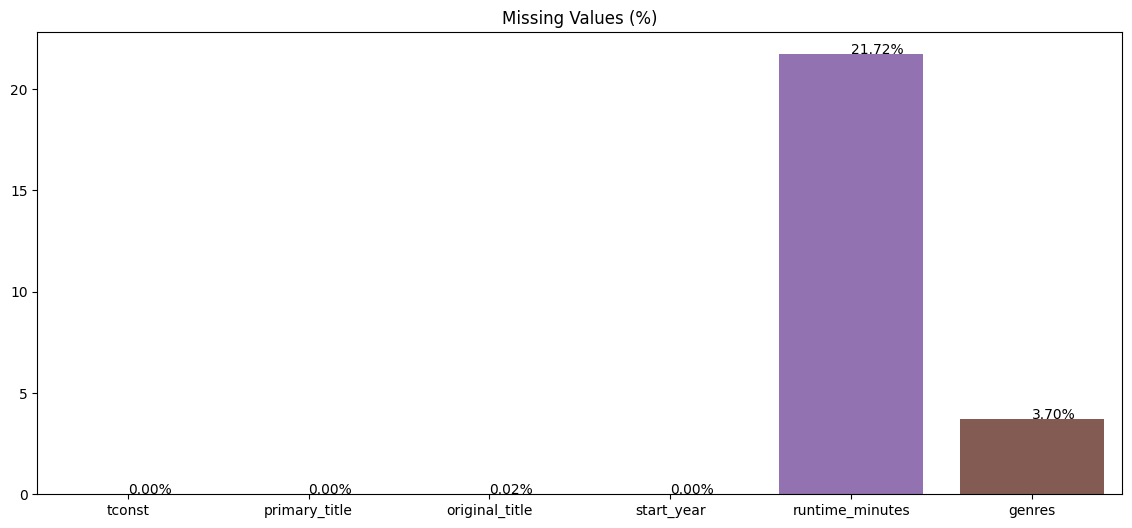

In [20]:
visualize_missing_values(df_IMDB_title_basics_df)

- **The columns `runtime_minutes` and `genres` have missing values in 21.72% and 3.70% of the cases, respectively. Since these proportions are relatively low, we can safely remove the corresponding rows from the data set. This is a reasonable approach to handle missing data in these variables. Another appraoch is to drop columns that would not be instrumental in our analysis.**
- **The `primary_title` is in English and this is what we are interested in. We shall keep this column and drop the `original_title` as they are more or less the same thing. We can also note that the `original_title` has some missing value but not a significant amount but none the less we will still drop this column.**

In [ ]:
# drop the columns not needed for analysis
df_IMDB_title_basics_df.drop(columns=['original_title','tconst','start_year','runtime_minutes'], inplace=True)

# check for the number of duplicate values
print("There are:", df_IMDB_title_basics_df.duplicated().sum(), "duplicated values")

# drop the duplicate values
df_IMDB_title_basics_df = df_IMDB_title_basics_df.drop_duplicates(subset=None, keep='first')
display(df_IMDB_title_basics_df.duplicated().any())

# change the column values to lower case for consistency
df_IMDB_title_basics_df['primary_title'] = df_IMDB_title_basics_df['primary_title'].str.lower()
df_IMDB_title_basics_df['genres'] = df_IMDB_title_basics_df['genres'].str.lower()

# rename the column Primay_title to movie_title
df_IMDB_title_basics_df.rename(columns={'primary_title': 'movie_title'}, inplace=True)

# dropping missing values in the `genres` column
df_IMDB_title_basics_df.dropna(inplace=True)

# change all multiple genre observations into the string "cross-genre"
df_IMDB_title_basics_df['genres'] = df_IMDB_title_basics_df['genres'].apply(lambda x: 'cross-genre' if ',' in x else x)

df_IMDB_title_basics_df.info()

display(df_IMDB_title_basics_df.head())

### Data Cleaning & Preparation for the `IMDB Crew Titles` dataset.

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
,tconst,directors,writers


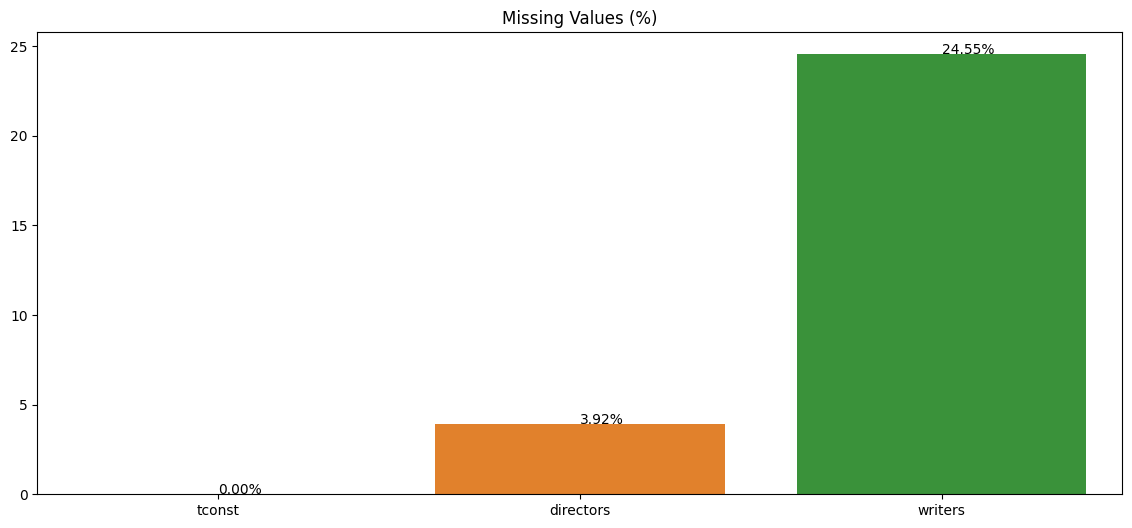

In [23]:
visualize_missing_values(IMDB_title_crew_df)

**Not much context from this dataset s well. This will not be instrumental for our analysis.**

### Data Cleaning & Preparation for the `IMDB Principal Titles` dataset.

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
,tconst,ordering,nconst,category,job,characters


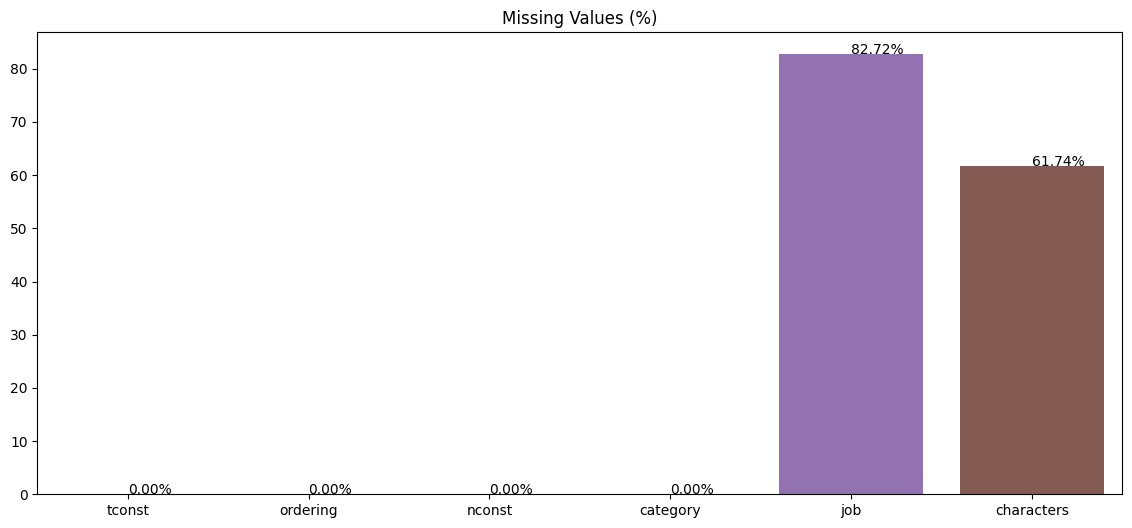

In [24]:
visualize_missing_values(IMDB_title_principals_df)

**This dataset has limited contextual information, which affects the quality of our analysis. We can join this dataset with other datasets such as `IMDB Crew Titles`, `IMDB Ratings`, or `IMDB Basic Names` using the `tconst` and `nconst` columns. However, this may not provide much relevant context, as these datasets mainly contain information about the movie staff. Moreover, this may result in a high cardinality dataset, since one person can have multiple roles and credits in different movies.**

### Data Cleaning & Preparation for the `IMDB Ratings` dataset.

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
,tconst,averagerating,numvotes


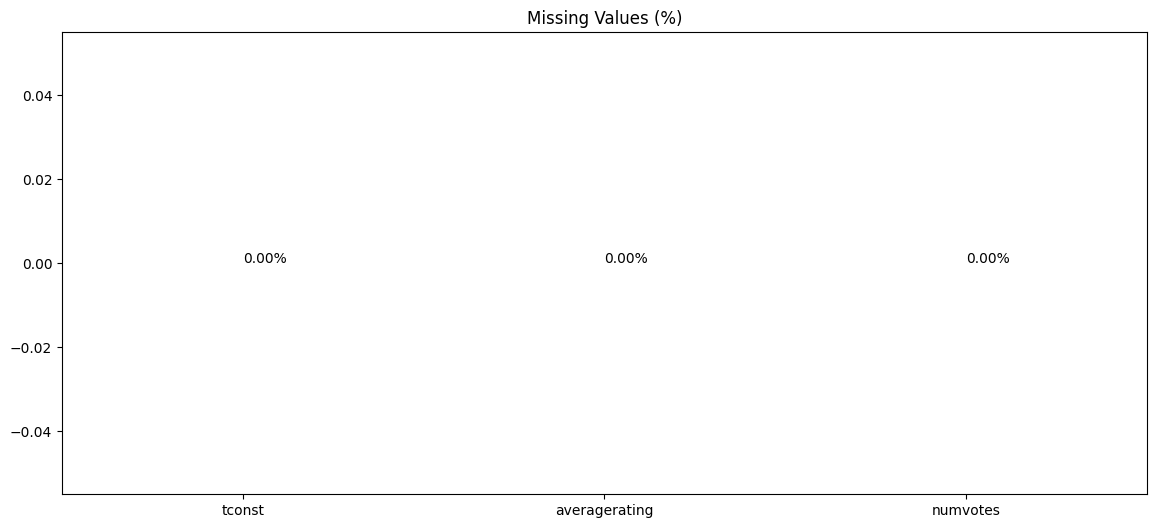

In [25]:
visualize_missing_values(IMDB_ratings_df)

**The `TMDB Movies` dataset provides more granular information on the `averagerating` and `numvotes` columns. Therefore, this dataset does not offer any additional value for our analysis.**

### Data Cleaning & Preparation for the `Rotten Tomatoes Movies Info` dataset.

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. Teamed with 

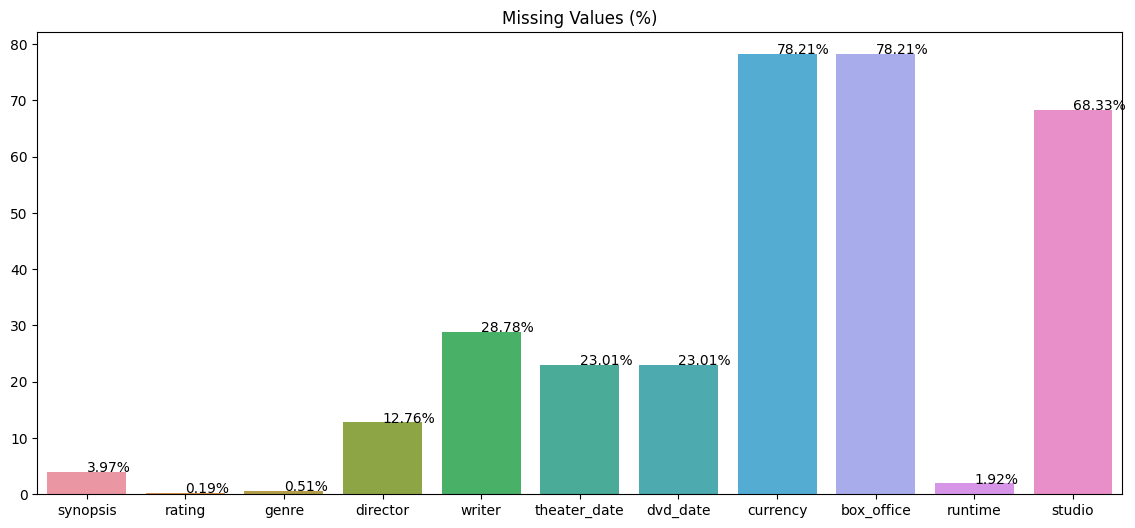

In [26]:
visualize_missing_values(rt_movie_info_df)

**Not much we work work with from the above dataset. The columns : `rating`, `genre`, `director`, `writer`, `theater_date`, `dvd_date`, `box_office`, `runtime`, `studio` have already been derived from the other datasets.**

### ⭐ Data Cleaning & Preparation for the `TMDB Movies` dataset.

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


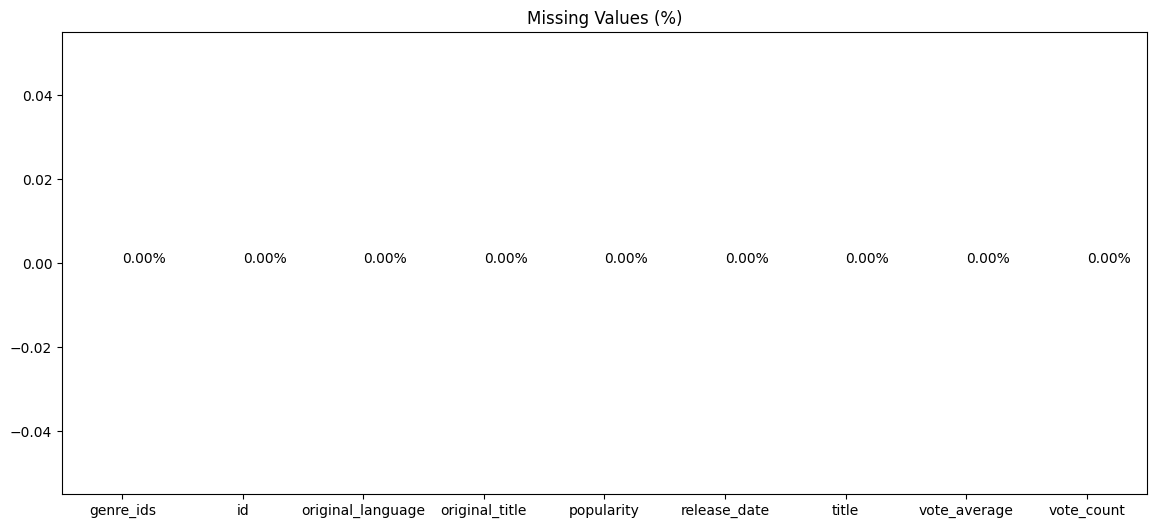

In [27]:
visualize_missing_values(tmdb_movies_df.head())

**At first glance we scan see that there aren't any missing values in this dataset. However, we can see that the `release_date` column is in the wrong data type format. We shall convert this column to the correct data type format.**

In [28]:
# convert the release_date column to datetime
# tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

# checking for duplicate values
tmdb_movies_df.duplicated().sum()

# drop the duplicate values and display the result
tmdb_movies_df.drop_duplicates(subset=None, keep='first', inplace=True)
display(tmdb_movies_df.duplicated().any())

# drop the columns not neceswary for analysis
tmdb_movies_df.drop(columns=['genre_ids','id','original_title', 'release_date'], inplace=True)

# change the column values to lower case for consistency
tmdb_movies_df['original_language'] = tmdb_movies_df['original_language'].str.lower()
tmdb_movies_df['title'] = tmdb_movies_df['title'].str.lower()

# rename the title column to movie_title
tmdb_movies_df.rename(columns={'title': 'movie_title'}, inplace=True)

tmdb_movies_df.head()

False

,original_language,popularity,movie_title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


### ⭐ Data Cleaning & Preparation for the `TN Movie Budgets` dataset.

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,


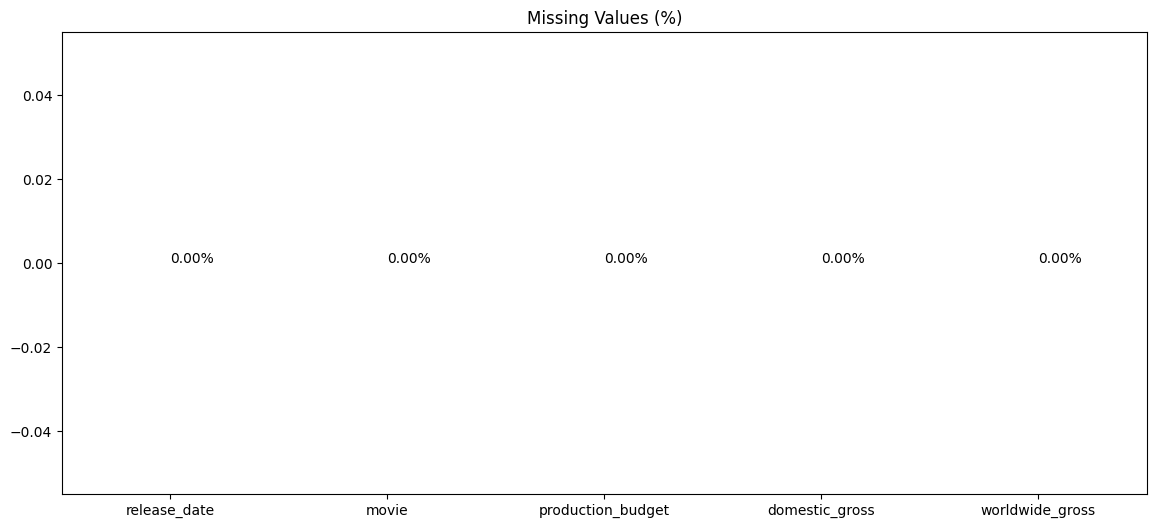

In [29]:
visualize_missing_values(tn_movie_budgets_df)

In [30]:
tn_movie_budgets_df.reset_index(inplace=True)

tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**Data preparation for the "domestic_gross" column:**
- Remove currency symbols ($)
- Remove thousands separators (,)
- Cast string values to integer type

In [31]:
# get rid of money symbols in the domestic_gross, foreign_gross, and production_budget columns
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(np.int64)

tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [32]:
# convert release_date to date time object 

tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])

# Now just retrive the year from the release_date column and rename it to release_year

tn_movie_budgets_df['release_year'] = tn_movie_budgets_df['release_date'].dt.year

# Now just retrive the month from the release_date column and rename it to release_month

tn_movie_budgets_df['release_month'] = tn_movie_budgets_df['release_date'].dt.month

# drop unnecessary columns
tn_movie_budgets_df.drop(columns = ['id', 'domestic_gross'], inplace=True)

# lower case column values for consistency
tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].str.lower()

# check for duplicate values
display(tn_movie_budgets_df.duplicated().sum())

# rename the movie column to movie_title
tn_movie_budgets_df.rename(columns={'movie': 'movie_title'}, inplace=True)

tn_movie_budgets_df.head()

0

,release_date,movie_title,production_budget,worldwide_gross,release_year,release_month
0,2009-12-18,avatar,425000000,2776345279,2009,12
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,1045663875,2011,5
2,2019-06-07,dark phoenix,350000000,149762350,2019,6
3,2015-05-01,avengers: age of ultron,330600000,1403013963,2015,5
4,2017-12-15,star wars ep. viii: the last jedi,317000000,1316721747,2017,12


>**VERDICT:** 3 datsets

**Merging Datasets.**

**To ensure that every row contains information on the same movies across the three datasets, we will perform an inner join on the 'movie_title' column.**

In [33]:
df_record_merged = tmdb_movies_df.merge(tn_movie_budgets_df, on='movie_title')
df_record_merged.head()

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month
0,en,28.734,how to train your dragon,7.7,7610,2010-03-26,165000000,494870992,2010,3
1,en,28.515,iron man 2,6.8,12368,2010-05-07,170000000,621156389,2010,5
2,en,28.005,toy story,7.9,10174,1995-11-22,30000000,364545516,1995,11
3,en,27.920,inception,8.3,22186,2010-07-16,160000000,835524642,2010,7
4,en,26.691,percy jackson & the olympians: the lightning t...,6.1,4229,2010-02-12,95000000,223050874,2010,2


In [34]:
df_record_merged = df_record_merged.merge(df_IMDB_title_basics_df, on='movie_title').merge(bom_movie_gross_df, on='movie_title')
df_record_merged.head()

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio
0,en,28.734,how to train your dragon,7.7,7610,2010-03-26,165000000,494870992,2010,3,cross-genre,P/DW
1,en,28.515,iron man 2,6.8,12368,2010-05-07,170000000,621156389,2010,5,cross-genre,Par.
2,en,27.920,inception,8.3,22186,2010-07-16,160000000,835524642,2010,7,cross-genre,WB
3,en,26.691,percy jackson & the olympians: the lightning t...,6.1,4229,2010-02-12,95000000,223050874,2010,2,cross-genre,Fox
4,en,24.445,toy story 3,7.7,8340,2010-06-18,200000000,1068879522,2010,6,cross-genre,BV


In [49]:
df_record_merged[df_record_merged['movie_title'] == 'avatar']

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio


In [36]:
df_record_merged[df_record_merged.duplicated(subset=['movie_title'])]

,original_language,popularity,movie_title,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio
19,en,15.444,robin hood,6.3,2569,2010-05-14,210000000,322459006,2010,5,cross-genre,Uni.
20,en,15.444,robin hood,6.3,2569,2010-05-14,210000000,322459006,2010,5,cross-genre,Uni.
21,en,15.444,robin hood,6.3,2569,2010-05-14,210000000,322459006,2010,5,cross-genre,Uni.
22,en,15.444,robin hood,6.3,2569,2018-11-21,99000000,84747441,2018,11,cross-genre,Uni.
23,en,15.444,robin hood,6.3,2569,2018-11-21,99000000,84747441,2018,11,cross-genre,Uni.
...,...,...,...,...,...,...,...,...,...,...,...,...
1813,en,20.628,widows,6.5,941,2018-11-16,40000000,73866088,2018,11,comedy,Fox
1818,en,19.459,game night,6.9,2756,2018-02-23,37000000,117378084,2018,2,cross-genre,WB (NL)
1827,en,16.999,slender man,4.0,712,2018-08-10,10000000,51723644,2018,8,cross-genre,SGem
1842,en,13.696,life of the party,6.2,435,2018-05-11,30000000,65759911,2018,5,comedy,WB (NL)


**We can already notice duplicate movies in the movie_title column. We will drop these duplicates.**

In [58]:
# Apply the groupby method to the movie data and select the first row of each group as the representative sample.

df_record_merged = df_record_merged.groupby('movie_title').first().reset_index()

df_record_merged.head()

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio
0,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,2016,3,cross-genre,Par.
1,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,2018,1,cross-genre,WB
2,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,2013,10,cross-genre,FoxS
3,127 hours,en,11.435,7.0,4469,2010-11-05,18000000,60217171,2010,11,cross-genre,FoxS
4,13 sins,en,10.899,6.3,576,2014-04-18,4000000,47552,2014,4,cross-genre,RTWC


In [38]:
df_record_merged[df_record_merged.duplicated(subset=['movie_title'])]

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio


In [55]:
# Export the cleaned data to a csv file

df_record_merged.to_csv('cleaned_data.csv', index=False)

## <font color='goldenrod'>4. Exploratory Data Analysis</font>

### Univariate Data Anlysis.

In [59]:
# load the cleaned data

df = pd.read_csv('cleaned_data.csv')

df.head()

,movie_title,original_language,popularity,vote_average,vote_count,release_date,production_budget,worldwide_gross,release_year,release_month,genres,studio
0,10 cloverfield lane,en,17.892,6.9,4629,2016-03-11,5000000,108286422,2016,3,cross-genre,Par.
1,12 strong,en,13.183,5.6,1312,2018-01-19,35000000,71118378,2018,1,cross-genre,WB
2,12 years a slave,en,16.493,7.9,6631,2013-10-18,20000000,181025343,2013,10,cross-genre,FoxS
3,127 hours,en,11.435,7.0,4469,2010-11-05,18000000,60217171,2010,11,cross-genre,FoxS
4,13 sins,en,10.899,6.3,576,2014-04-18,4000000,47552,2014,4,cross-genre,RTWC


In [62]:
df['genres'].value_counts()

genres
cross-genre    1084
drama            46
comedy           35
documentary      13
horror            8
action            4
thriller          3
fantasy           2
crime             1
animation         1
family            1
Name: count, dtype: int64